In [1]:
#package for read data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt

## EDA

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)

(381109, 12)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
dup=train.duplicated()
train[dup]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train.Response.value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

In [9]:
for i in train.columns:
    if train[i].dtype=="object":
        print(train[i].value_counts())

Male      206089
Female    175020
Name: Gender, dtype: int64
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


Check which of the values in categorial form and number form

In [10]:
cat=[]
num=[]
for i in train.columns:
    if train[i].dtype=="object":
           cat.append(i)
            
    else:
            num.append(i)

In [11]:
print(cat)
print(num)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


Checking the Data in more depth for the Numerical and Categorical Data.

In [12]:
train[num].describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [13]:
train[cat].describe().T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [14]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
train.Gender = [Gender[item] for item in train.Gender] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [15]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
train.Vehicle_Age = [Vehicle_Age[item] for item in train.Vehicle_Age] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age Vehicle

In [16]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 0,'No': 1} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
train.Vehicle_Damage = [Vehicle_Damage[item] for item in train.Vehicle_Damage] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicl

In [17]:
train.info()
train[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,0,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,2,1,27496.0,152.0,39,0
5,6,0,24,1,33.0,0,2,0,2630.0,160.0,176,0
6,7,1,23,1,11.0,0,2,0,23367.0,152.0,249,0
7,8,0,56,1,28.0,0,1,0,32031.0,26.0,72,1
8,9,0,24,1,3.0,1,2,1,27619.0,152.0,28,0
9,10,0,32,1,6.0,1,2,1,28771.0,152.0,80,0


In [18]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
test.Gender = [Gender[item] for item in test.Gender] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age Vehicle_

In [19]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 1,'No':0} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
test.Vehicle_Damage = [Vehicle_Damage[item] for item in test.Vehicle_Damage] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age  Vehicle

In [20]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
test.Vehicle_Age = [Vehicle_Age[item] for item in test.Vehicle_Age] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

        Vehicle_Age  Vehicl

### Checking to make sure all values in number form

In [21]:
test.info()
test[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  int64  
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  int64  
 7   Vehicle_Damage        127037 non-null  int64  
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 10.7 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,2,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,2,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,2,0,59097.0,152.0,297
5,381115,1,22,1,30.0,1,2,0,40207.0,152.0,266
6,381116,0,51,1,37.0,1,1,0,40118.0,26.0,107
7,381117,1,25,1,41.0,1,2,0,23375.0,152.0,232
8,381118,1,42,1,41.0,0,1,1,2630.0,26.0,277
9,381119,0,37,1,12.0,1,1,0,27124.0,124.0,133


In [22]:
cat=[]
num=[]
for i in train.columns:
    if train[i].dtype=="object":
           cat.append(i)
            
    else:
            num.append(i)

In [23]:
print(cat)
print(num)

[]
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [24]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [25]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Response"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Response,
0,334399
1,46710


In [26]:
train.Response.value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

## Data Visualisation

In [27]:
#Select feature column names and target variable we are going to use for training
features=['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium',
'Policy_Sales_Channel','Vintage']
target = 'Response'

In [28]:
#This is input which our classifier will use as an input.
train[features].head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,0,0,40454.0,26.0,217
1,1,76,1,3.0,0,1,1,33536.0,26.0,183
2,1,47,1,28.0,0,0,0,38294.0,26.0,27
3,1,21,1,11.0,1,2,1,28619.0,152.0,203
4,0,29,1,41.0,1,2,1,27496.0,152.0,39
5,0,24,1,33.0,0,2,0,2630.0,160.0,176
6,1,23,1,11.0,0,2,0,23367.0,152.0,249
7,0,56,1,28.0,0,1,0,32031.0,26.0,72
8,0,24,1,3.0,1,2,1,27619.0,152.0,28
9,0,32,1,6.0,1,2,1,28771.0,152.0,80


In [29]:
#Display first 10 target variables
train[target].head(10).values

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [30]:
train[num].describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109.0,0.540761,0.498336,0.0,0.0,1.0,1.0,1.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109.0,1.390384,0.567439,0.0,1.0,1.0,2.0,2.0
Vehicle_Damage,381109.0,0.495123,0.499977,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


In [31]:
for i in train.columns:
    if train[i].dtype=="object":
        print(train[i].value_counts())

C:\Users\CHENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

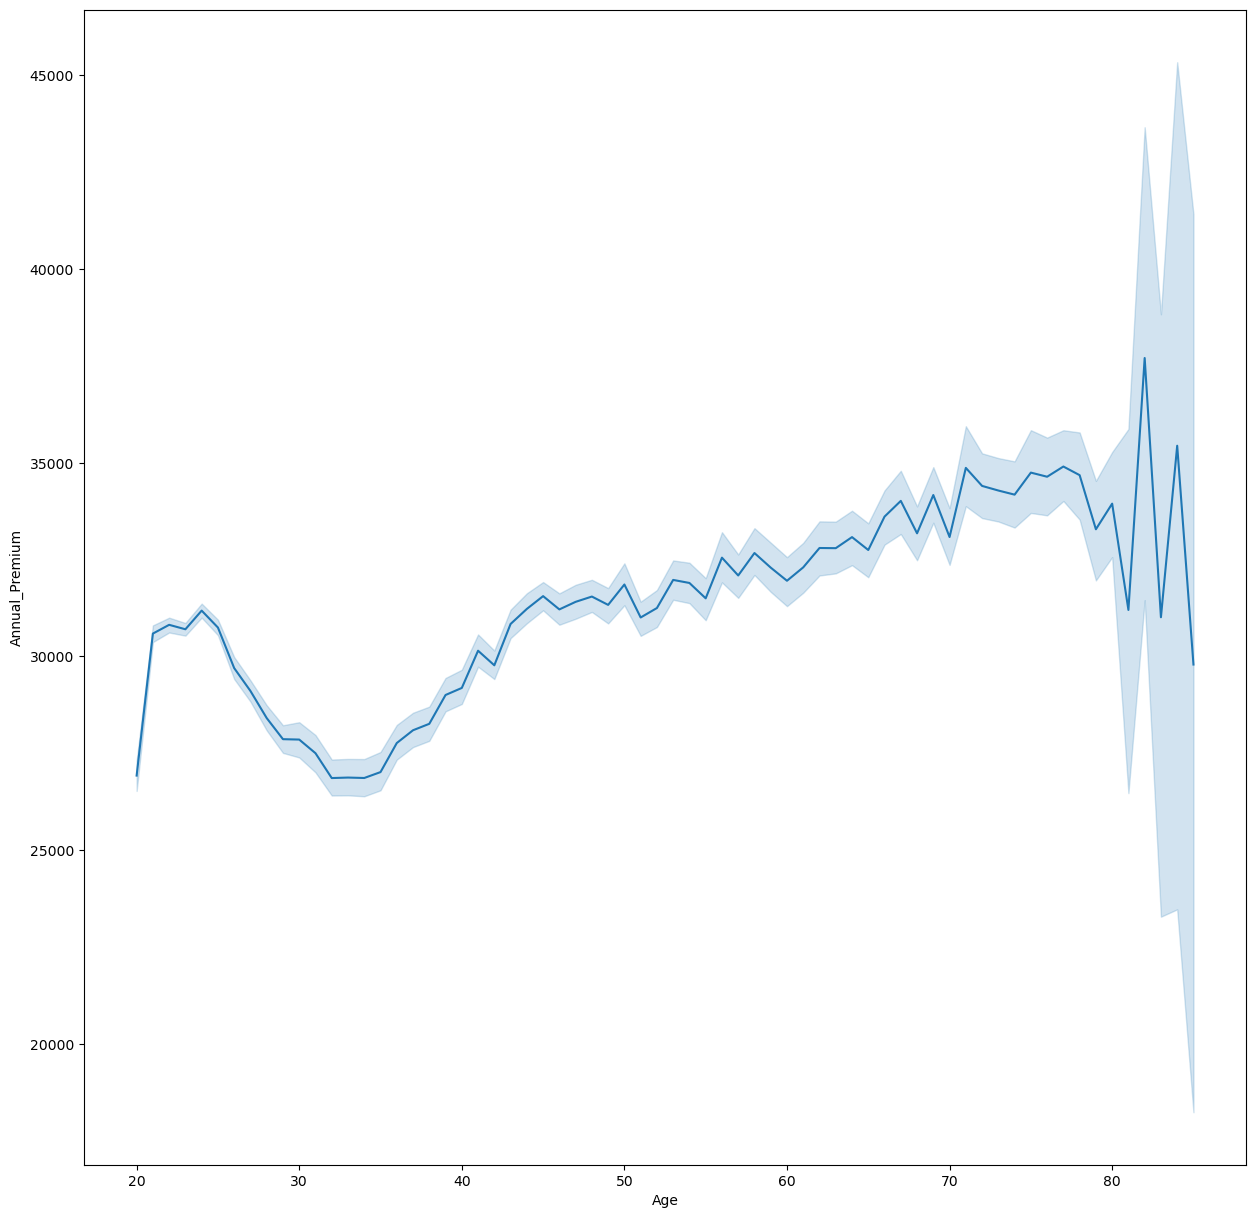

In [32]:
plt.figure(figsize=(15,15))
sns.lineplot(train["Age"],train["Annual_Premium"])

Age and premium is sure to have a relation as we can see that with the increase in the age the premium increases. The lowest premium is of the age group range of 20-40 and there is a rise in premium after 50 and a steady rise till 80 where there are peaks of the premium .Premium and age are very important factor when it comes to analysing insurance data

C:\Users\CHENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


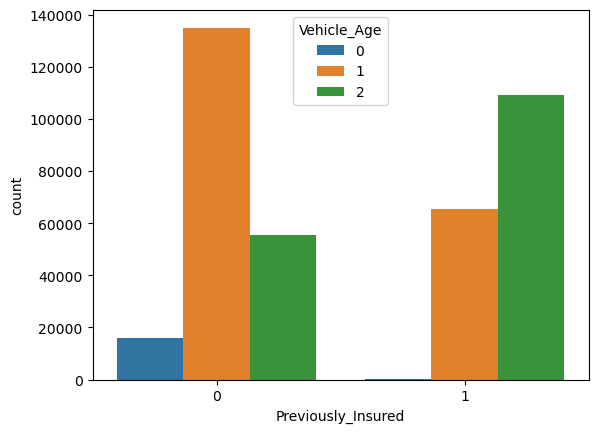

In [33]:
sns.countplot(train["Previously_Insured"], hue=train["Vehicle_Age"])
plt.show()

C:\Users\CHENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium', ylabel='Age'>

C:\Users\CHENG\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


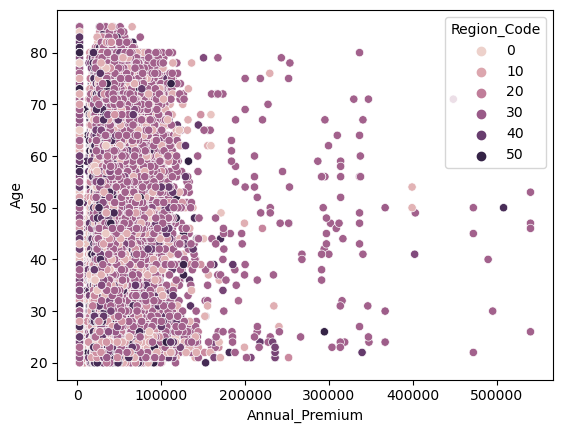

In [34]:
sns.scatterplot(train["Annual_Premium"],train["Age"],hue=train["Region_Code"])

Region doesn't shows a very strong connection to the Premium

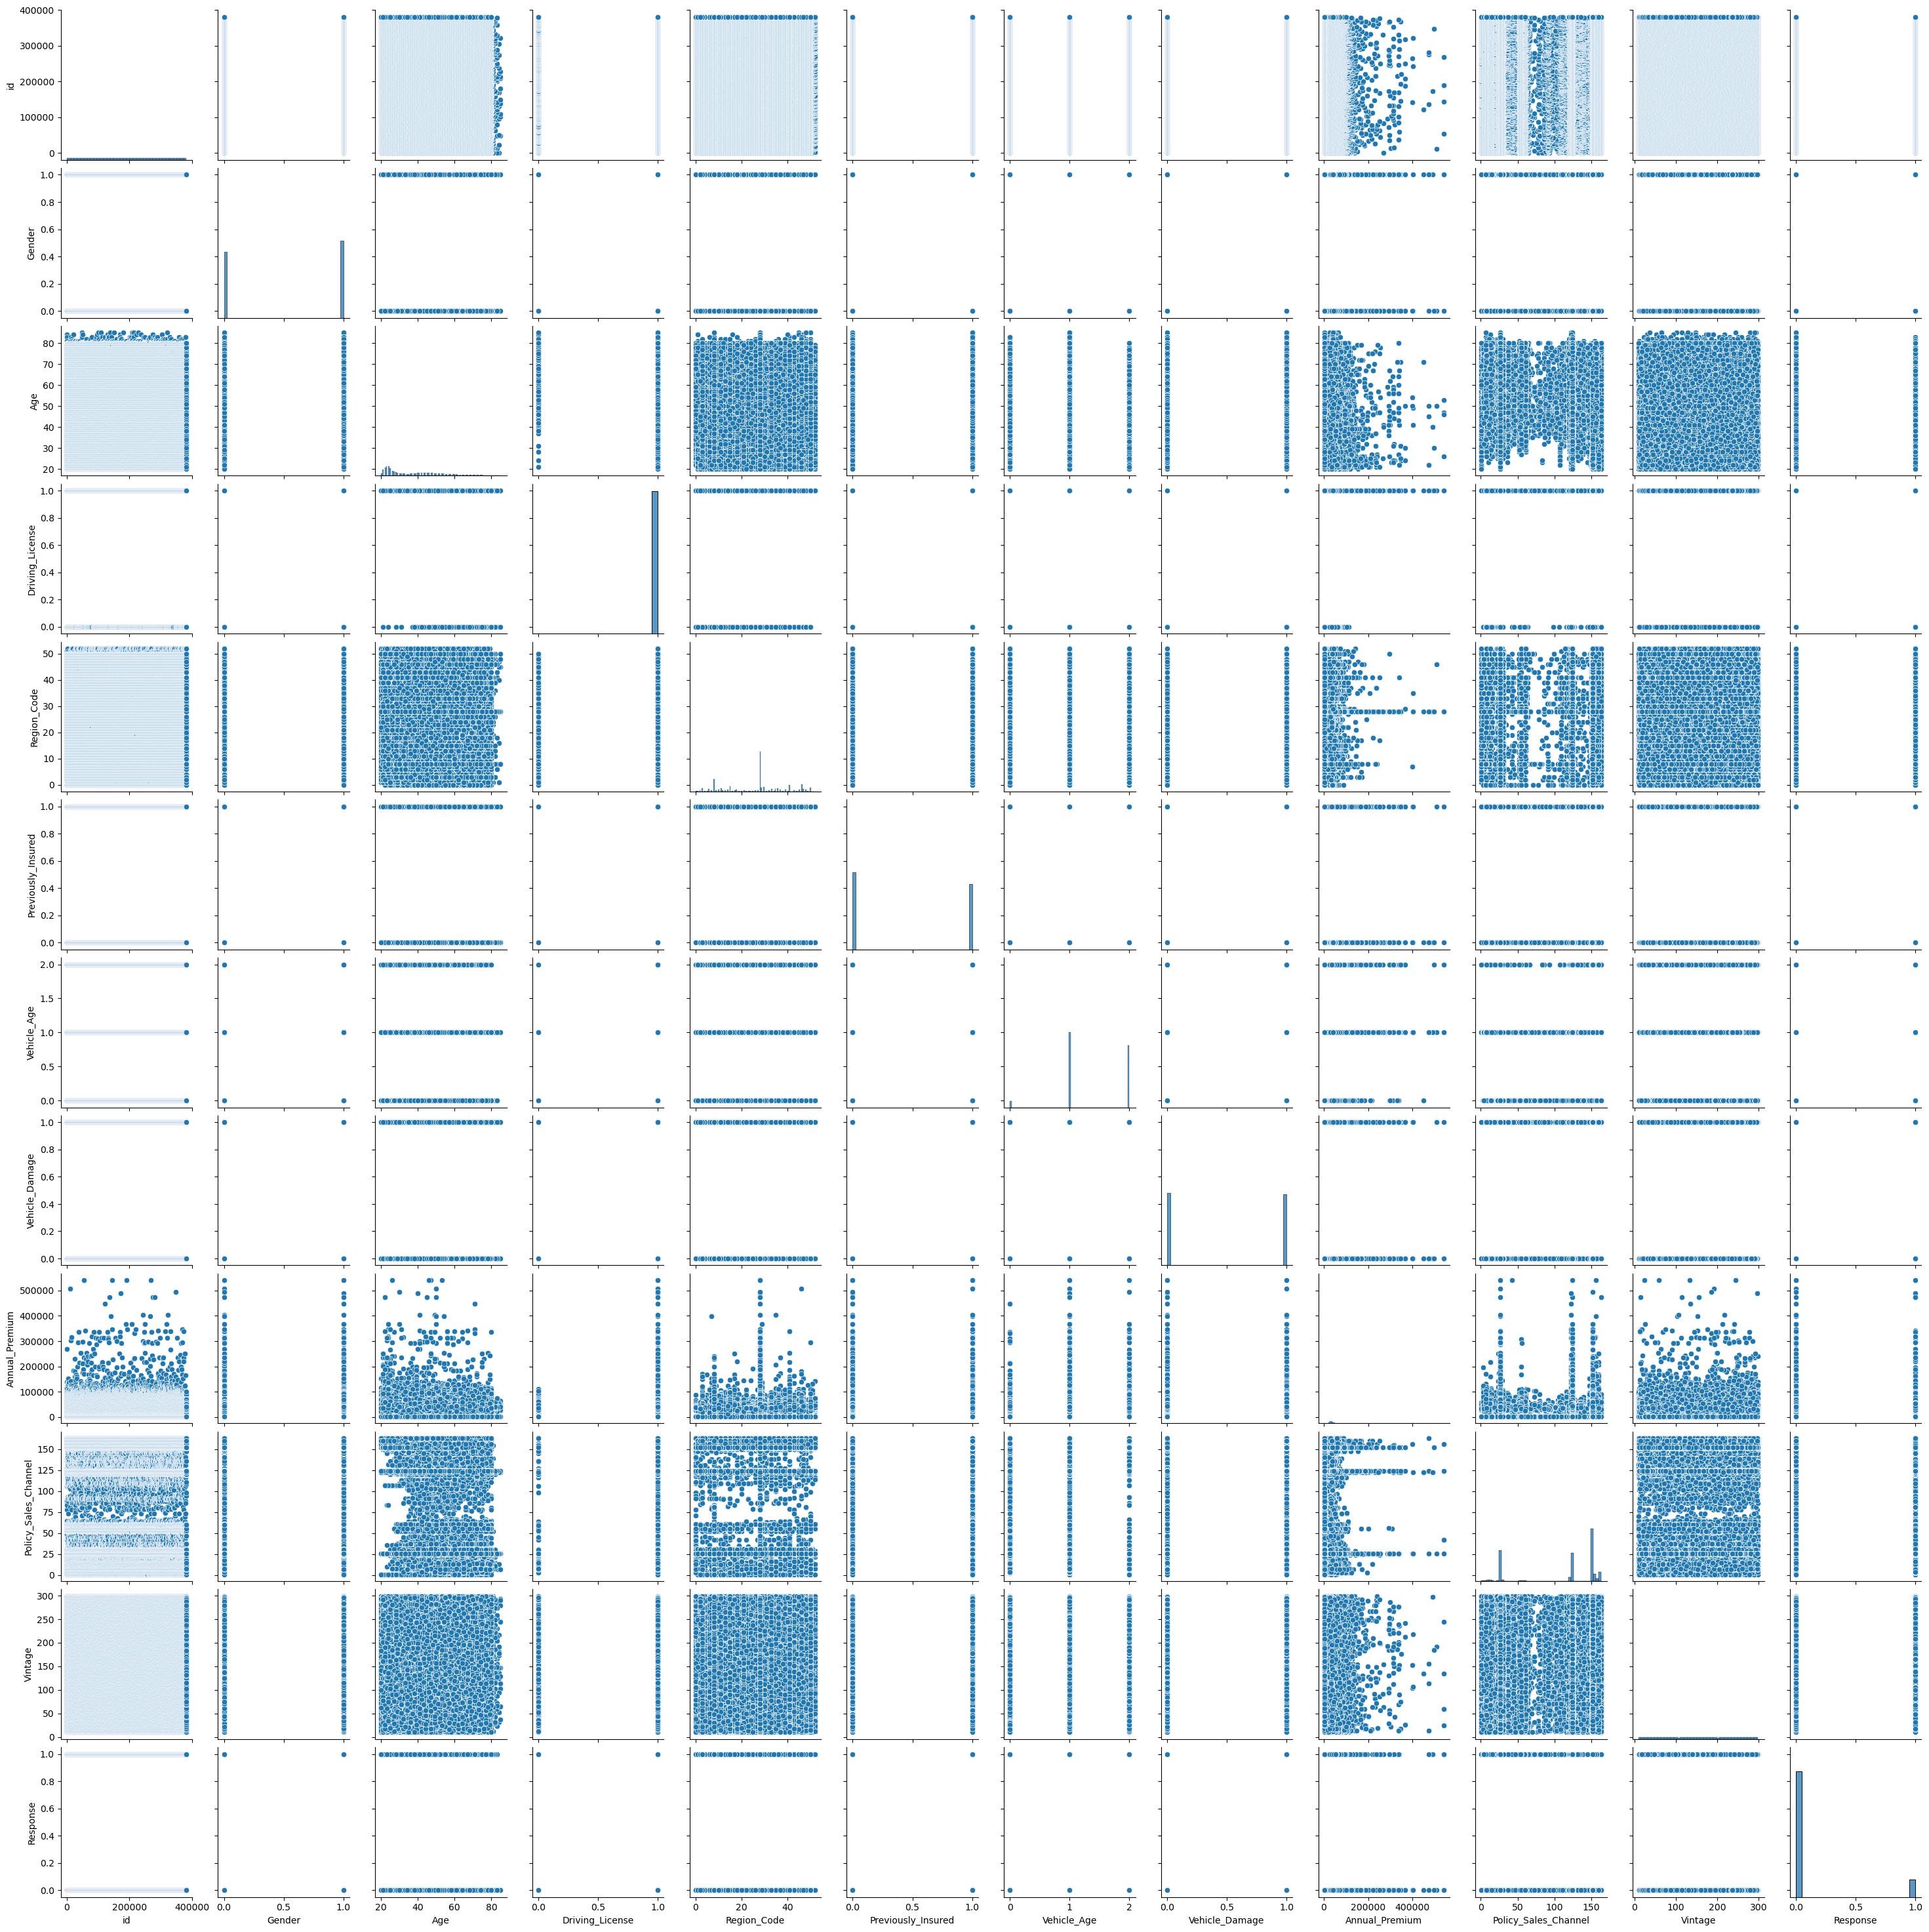

In [35]:
sns.pairplot(train)

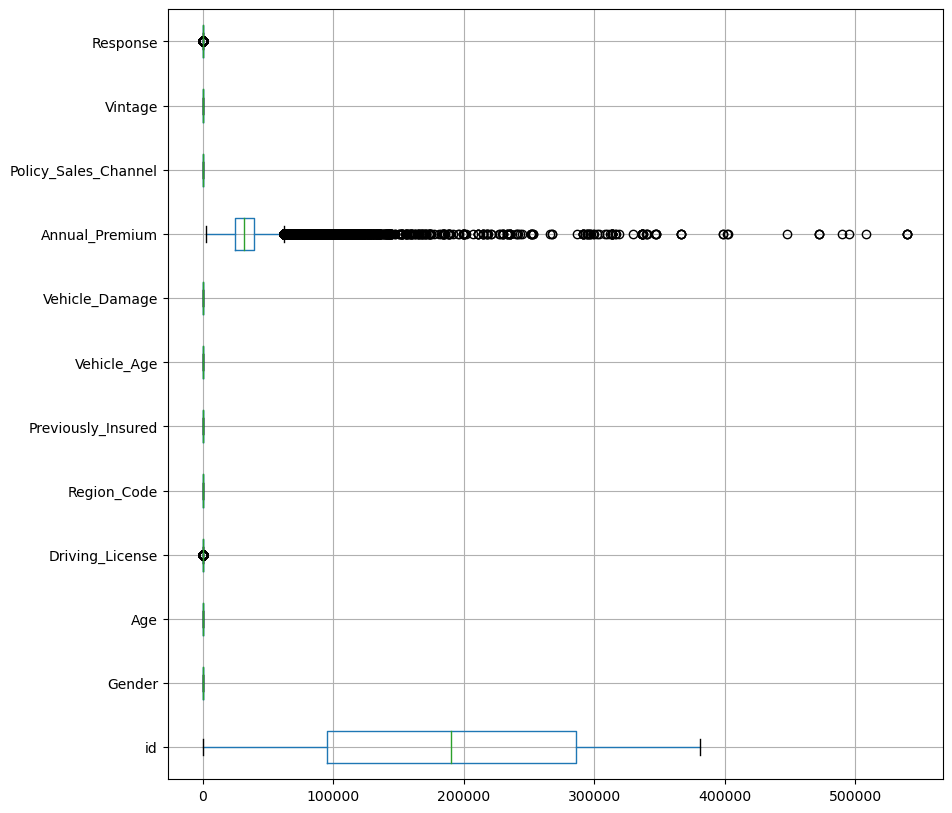

In [36]:
plt.figure(figsize=(10,10))
train.boxplot(vert=0)
plt.show()

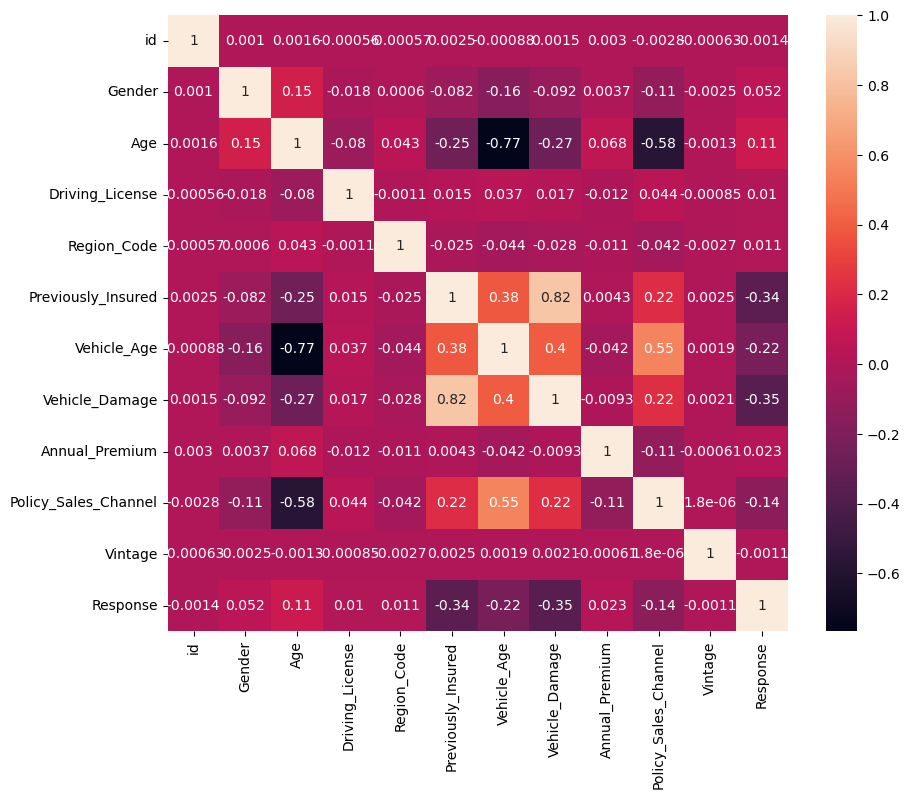

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

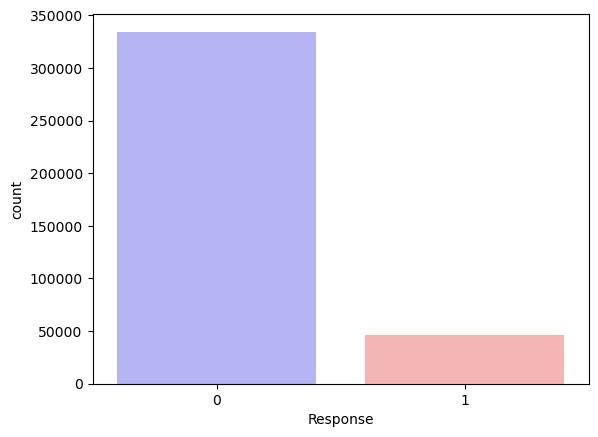

In [38]:
#visualisation the data
sns.countplot(x='Response', data=train, palette='bwr')
plt.show()

In [39]:
#then defining attributes and target variable of the data
X = train.drop(['Response'], axis=1)
y = train['Response']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=10)

## Naive Bayes Model

Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. The technique behind Naive Bayes is easy to understand. Naive Bayes has higher accuracy and speed when we have large data points.

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [42]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [43]:
y_train_predict1 = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict1))
print(metrics.classification_report(y_train, y_train_predict1))

0.8762170653288132
[[250311    457]
 [ 34924    139]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250768
           1       0.23      0.00      0.01     35063

    accuracy                           0.88    285831
   macro avg       0.56      0.50      0.47    285831
weighted avg       0.80      0.88      0.82    285831



In [44]:
y_test.value_counts()

0    83631
1    11647
Name: Response, dtype: int64

In [45]:
y_test_predict1 = NB_model.predict(X_test)
model_scoreNB = NB_model.score(X_test, y_test)
print(model_scoreNB)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.8768341065093725
[[83488   143]
 [11592    55]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.28      0.00      0.01     11647

    accuracy                           0.88     95278
   macro avg       0.58      0.50      0.47     95278
weighted avg       0.80      0.88      0.82     95278



              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.28      0.00      0.01     11647

    accuracy                           0.88     95278
   macro avg       0.58      0.50      0.47     95278
weighted avg       0.80      0.88      0.82     95278

GaussianNB Accuracy= 0.8768341065


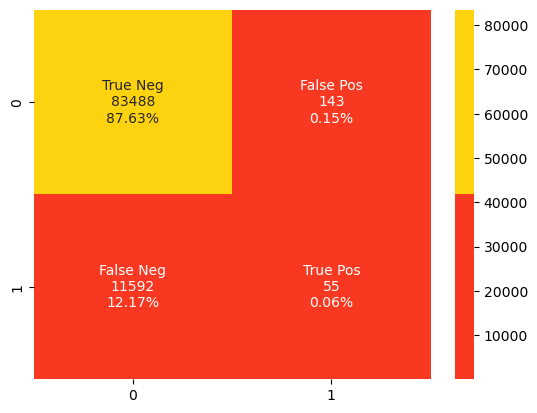

In [46]:
colors = ['#F93822','#FDD20E']

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Labelling the matrix
names = ['True Neg','False Pos','False Neg','True Pos']

# Counts of the test data and labelling it on the matrix
counts = [value for value in cm.flatten()]

# Get the % of the grand total on the matrix
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

# Classification Report
print(classification_report(y_test, y_pred))
print('GaussianNB Accuracy= {:.10f}'.format(accuracy_score(y_test, y_pred)))


## Decision Tree

In [47]:
#import the decision tree package, Machine learning Algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
#the we need splitting the data for doing modeling into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [49]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_train_predict2 = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict2))
print(metrics.classification_report(y_train, y_train_predict2))

1.0
[[250768      0]
 [     0  35063]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250768
           1       1.00      1.00      1.00     35063

    accuracy                           1.00    285831
   macro avg       1.00      1.00      1.00    285831
weighted avg       1.00      1.00      1.00    285831



In [51]:
y_test.value_counts()

0    83631
1    11647
Name: Response, dtype: int64

In [52]:
y_test_predict2 = DT_model.predict(X_test)
model_scoreNB = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict2))
print(metrics.classification_report(y_test, y_test_predict2))

1.0
[[74870  8761]
 [ 8040  3607]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     83631
           1       0.29      0.31      0.30     11647

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.83     95278



              precision    recall  f1-score   support

           0       0.90      0.90      0.90     83631
           1       0.29      0.31      0.30     11647

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.83     95278

DT Accuracy= 0.8240307311


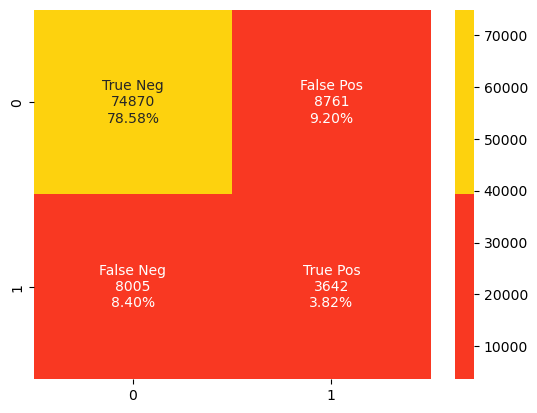

In [53]:
colors = ['#F93822','#FDD20E']


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
    
# Labelling the matrix
names = ['True Neg','False Pos','False Neg','True Pos']
    
# Counts of the test data and labelling it on the matrix
counts = [value for value in cm.flatten()]
    
# Get the % of the grand total on the matrix
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
# Classification Report
print(classification_report(y_test, y_pred))
print('DT Accuracy= {:.10f}'.format(accuracy_score(y_test, y_pred)))

In [54]:
dtc.score(X_test, y_test)*100

82.40307311236592

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [56]:
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print ("Listed below are the accuracy of the model respective to the value of K:")
mean_acc

C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Listed below are the accuracy of the model respective to the value of K:


array([0.78702324, 0.86677932, 0.84814963, 0.87249942, 0.86663238,
       0.87544869, 0.87304519, 0.87662419, 0.87559563, 0.87722244,
       0.87692857, 0.87754781, 0.87741136, 0.87765276, 0.87749533,
       0.87771574, 0.87766326, 0.87773673, 0.87771574, 0.87772623])

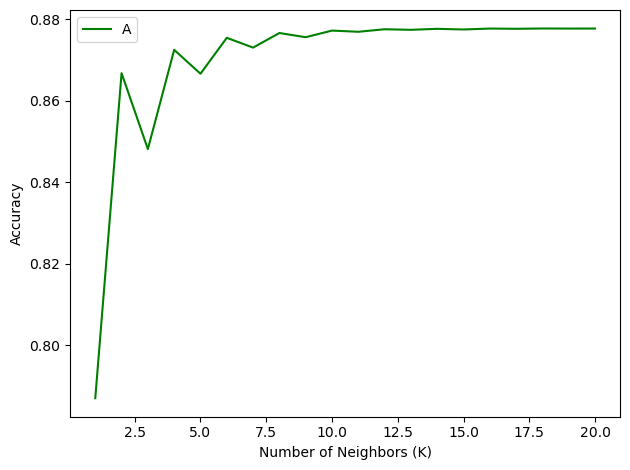

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Minimum error:- 0.12226327168916225 at K = 18


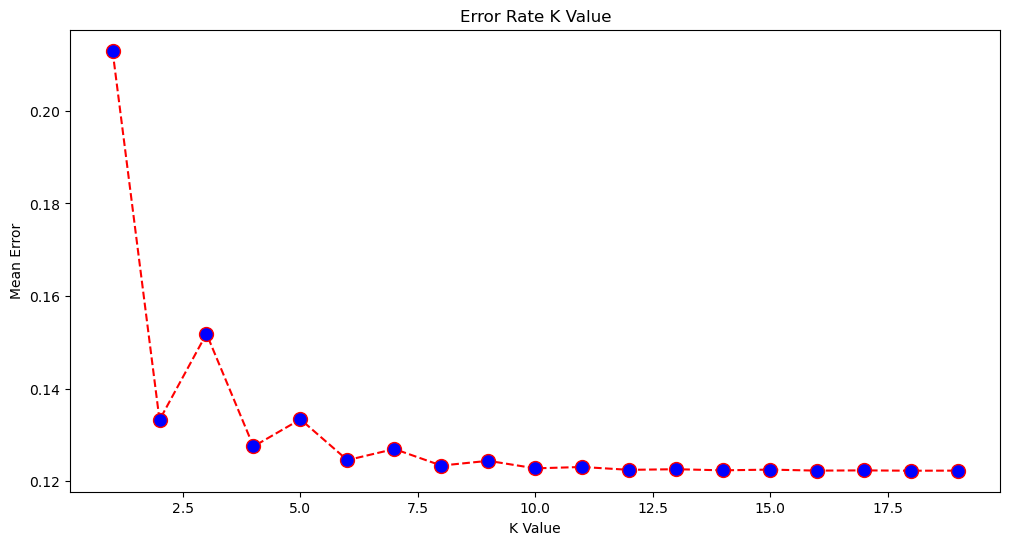

In [58]:
error = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    #finding the mean of the scenario when results of test 
    #not identical to value predicted by the model
    
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [59]:
KNN_model = KNeighborsClassifier(n_neighbors=i)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [60]:
y_train_predict3 = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict3))
print(metrics.classification_report(y_train, y_train_predict3))

C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.877350602278969
[[250763      5]
 [ 35052     11]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250768
           1       0.69      0.00      0.00     35063

    accuracy                           0.88    285831
   macro avg       0.78      0.50      0.47    285831
weighted avg       0.85      0.88      0.82    285831



In [61]:
y_test.value_counts()

0    83631
1    11647
Name: Response, dtype: int64

In [62]:
y_test_predict3 = KNN_model.predict(X_test)
model_scoreNB = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict3))
print(metrics.classification_report(y_test, y_test_predict3))

C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.877350602278969
[[83626     5]
 [11646     1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.17      0.00      0.00     11647

    accuracy                           0.88     95278
   macro avg       0.52      0.50      0.47     95278
weighted avg       0.79      0.88      0.82     95278



In [63]:
colors = ['#F93822','#FDD20E']


def model_evaluation(classifier):
    
    
    knn = KNeighborsClassifier(n_neighbors=classifier)    
    y_proba_knn = knn.fit(X_train, y_train).predict_proba(X_test)
    knn_predict = knn.predict(X_test)
    #roc = roc_auc_score(Y_test, y_proba_knn[:,1])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,knn_predict)
    
    # Labelling the matrix
    names = ['True Neg','False Pos','False Neg','True Pos']
    
    # Counts of the test data and labelling it on the matrix
    counts = [value for value in cm.flatten()]
    
    # Get the % of the grand total on the matrix
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,knn_predict))
    print('KNN Accuracy= {:.10f}'.format(accuracy_score(y_test, knn_predict)))

Evaluate the model for K =  18


C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.25      0.00      0.00     11647

    accuracy                           0.88     95278
   macro avg       0.56      0.50      0.47     95278
weighted avg       0.80      0.88      0.82     95278

KNN Accuracy= 0.8777367283


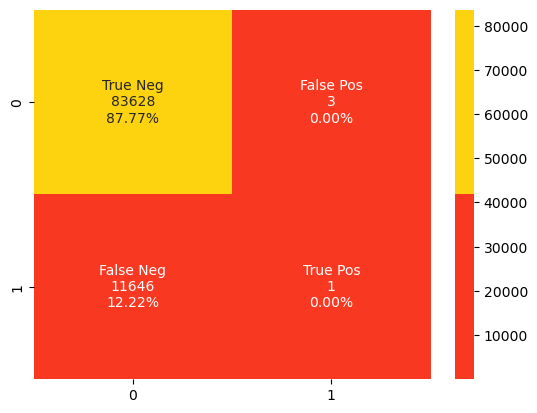

In [64]:
selected_k = mean_acc.argmax()+1
print ("Evaluate the model for K = ", selected_k)
model_evaluation(selected_k)

## Random forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=10)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [66]:
y_train_predict4 = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict4))
print(metrics.classification_report(y_train, y_train_predict4))

0.9999790085749971
[[250768      0]
 [     6  35057]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250768
           1       1.00      1.00      1.00     35063

    accuracy                           1.00    285831
   macro avg       1.00      1.00      1.00    285831
weighted avg       1.00      1.00      1.00    285831



In [67]:
y_test_predict4 = RF_model.predict(X_test)
model_scoreRF = RF_model.score(X_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_test_predict4))
print(metrics.classification_report(y_test, y_test_predict4))

0.8725833875606122
[[82177  1454]
 [10686   961]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83631
           1       0.40      0.08      0.14     11647

    accuracy                           0.87     95278
   macro avg       0.64      0.53      0.53     95278
weighted avg       0.83      0.87      0.83     95278



              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83631
           1       0.39      0.08      0.13     11647

    accuracy                           0.87     95278
   macro avg       0.64      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278

RF Accuracy= 0.8724469447


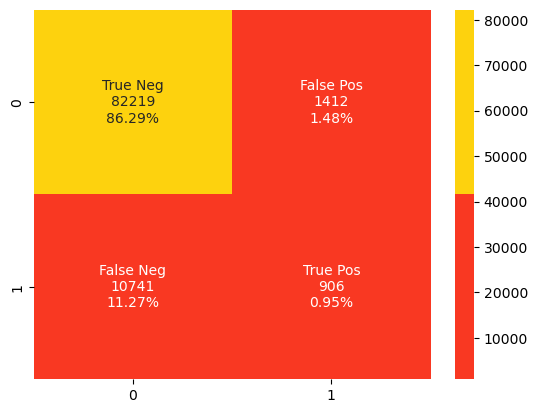

In [68]:
colors = ['#F93822','#FDD20E']


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
    
# Labelling the matrix
names = ['True Neg','False Pos','False Neg','True Pos']
    
# Counts of the test data and labelling it on the matrix
counts = [value for value in cm.flatten()]
    
# Get the % of the grand total on the matrix
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
# Classification Report
print(classification_report(y_test, y_pred))
print('RF Accuracy= {:.10f}'.format(accuracy_score(y_test, y_pred)))

## Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.877757719515523


In [71]:
y_train_predict5 = model.predict(X_train)
model_score =model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict5))
print(metrics.classification_report(y_train, y_train_predict5))

0.8773296108539661
[[250768      0]
 [ 35063      0]]


C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250768
           1       0.00      0.00      0.00     35063

    accuracy                           0.88    285831
   macro avg       0.44      0.50      0.47    285831
weighted avg       0.77      0.88      0.82    285831



C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
y_test_predict1 = model.predict(X_test)
model_scoreLR = model.score(X_test, y_test)
print(model_scoreLR)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.877757719515523
[[83631     0]
 [11647     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.00      0.00      0.00     11647

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHENG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83631
           1       0.00      0.00      0.00     11647

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

LR Accuracy= 0.8777577195


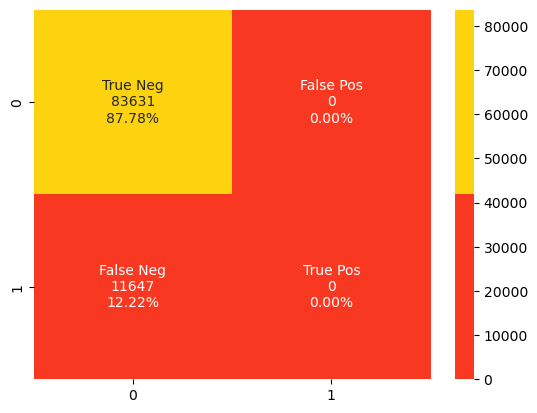

In [73]:
colors = ['#F93822','#FDD20E']


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
    
# Labelling the matrix
names = ['True Neg','False Pos','False Neg','True Pos']
    
# Counts of the test data and labelling it on the matrix
counts = [value for value in cm.flatten()]
    
# Get the % of the grand total on the matrix
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
# Classification Report
print(classification_report(y_test, y_pred))
print('LR Accuracy= {:.10f}'.format(accuracy_score(y_test, y_pred)))